In [1]:
#Import the libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('letterdata.csv')

In [4]:
df.shape

(20000, 17)

In [5]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


#### Separate the input and output variables

In [7]:
x = df.drop('letter', axis=1)
y = df['letter']

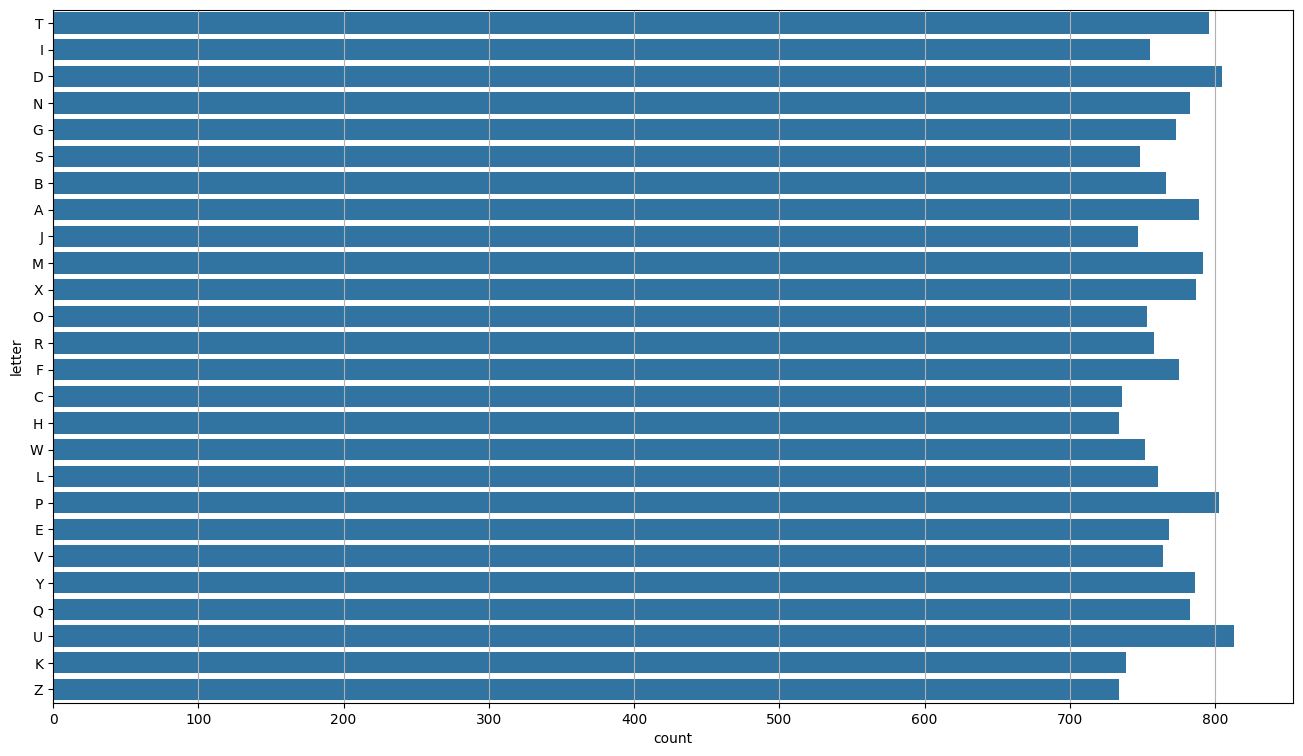

In [9]:
plt.figure(figsize=(16,9))
plt.grid()
sns.countplot(y=y);

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=24, test_size=0.2)

In [38]:
rf = RandomForestClassifier(n_estimators=20, random_state=24)

In [39]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=24)

### Performance Evaluation

In [40]:
y_pred = rf.predict(x_test)

In [41]:
print(accuracy_score(y_test,y_pred))

0.945


In [42]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[154   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   0]
 [  0 158   0   0   1   0   0   1   0   0   1   0   0   0   0   0   0   3
    0   0   0   4   0   0   0   0]
 [  0   0 155   0   0   0   3   0   0   0   1   2   0   0   0   0   0   1
    1   1   0   0   1   0   0   0]
 [  0   0   0 129   0   0   0   0   0   0   0   0   0   0   1   0   0   1
    0   0   0   0   0   1   0   0]
 [  0   1   0   0 148   1   1   0   0   0   1   0   0   0   0   0   0   0
    0   2   0   0   0   2   0   0]
 [  0   3   0   0   1 131   0   0   1   0   0   1   0   1   0   2   0   0
    1   2   0   0   0   0   0   0]
 [  0   3   2   0   1   1 126   0   0   0   1   0   0   0   2   0   4   0
    0   0   0   0   0   0   0   0]
 [  2   2   0   4   0   0   0 126   0   0   2   0   0   0   1   1   0   2
    0   0   0   0   0   1   0   0]
 [  0   1   0   1   2   0   0   0 160   3   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   1   0   0  

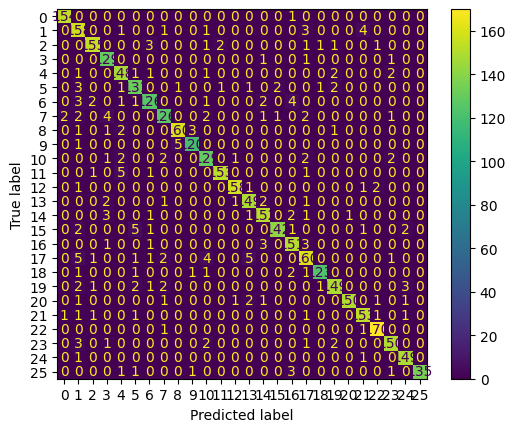

In [43]:
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

In [56]:
#new = x.iloc[345,:]
new = x.iloc[[345],:]

In [53]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
345,2,1,3,2,1,7,7,5,9,6,6,9,1,8,7,8


In [54]:
rf.predict(new)

array(['Z'], dtype=object)

In [55]:
y[345]

'Z'